1. Import liberaries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading CSV into IDE.

In [21]:
census_data = pd.read_csv('E:/projects/pakistan-census-analysis/data/pakistan_districts_census.csv')
census_data.head()

,Province,District,Population,Area_km²,Density,Literacy_Rate (%),Internet_Penetration (%),Urbanization (%)
0,Punjab,Lahore,3885/650,380.03,10224.59,50.93,22.28,71.55
1,Punjab,Rawalpindi,18449464,578.20,31908.45,57.83,11.64,35.3
2,Punjab,Faisalabad,17106909,2226.46,7683+46,64.38,49.38,69.09
3,Punjab,Multan,14226749,1005.41,14150.2,65.70,54.52,20.45
4,Punjab,Gujranwala,5507277,2534.05,2173.31,53.99,18.55,87.0


2. Check for Missing or Null Values

In [3]:
census_data.isnull().sum()

Province                    0
District                    0
Population                  0
Area_km²                    0
Density                     0
Literacy_Rate (%)           0
Internet_Penetration (%)    0
Urbanization (%)            0
dtype: int64

3. Clean Columns

In [4]:
print(census_data.columns.tolist())

['Province', 'District', 'Population', 'Area_km²', 'Density', 'Literacy_Rate (%)', 'Internet_Penetration (%)', 'Urbanization (%) ']


In [19]:
census_data.rename(columns=lambda x:x.strip(), inplace=True)

int_errors = r"[/,/./ /-/+]"
int_columns = census_data[['Population','Area_km²','Density']]
for i_col in int_columns:
    census_data[i_col] = census_data[i_col].astype(str).str.replace(int_errors,'', regex = True)
    census_data[i_col] = pd.to_numeric(census_data[i_col], errors='coerce').astype('Int64')

# for % values
f_errors = r"[,\%/ /-]"
f_columns = census_data[['Literacy_Rate (%)','Internet_Penetration (%)','Urbanization (%)']]
for f_col in f_columns:
    census_data[f_col] = census_data[f_col].astype(str).str.replace(f_errors,'', regex = True)
    census_data[f_col] = pd.to_numeric(census_data[f_col], errors='coerce')

In [20]:
census_data.head()

,Province,District,Population,Area_km²,Density,Literacy_Rate (%),Internet_Penetration (%),Urbanization (%)
0,Punjab,Lahore,3885650,38003,10224590,50.93,22.28,71.55
1,Punjab,Rawalpindi,18449464,5782,31908450,57.83,11.64,35.30
2,Punjab,Faisalabad,17106909,222646,7683460,64.38,49.38,69.09
3,Punjab,Multan,14226749,100541,1415020,65.70,54.52,20.45
4,Punjab,Gujranwala,5507277,253405,2173310,53.99,18.55,87.00


In [21]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  45 non-null     object 
 1   District                  45 non-null     object 
 2   Population                45 non-null     Int64  
 3   Area_km²                  45 non-null     Int64  
 4   Density                   44 non-null     Int64  
 5   Literacy_Rate (%)         45 non-null     float64
 6   Internet_Penetration (%)  45 non-null     float64
 7   Urbanization (%)          45 non-null     float64
dtypes: Int64(3), float64(3), object(2)
memory usage: 3.1+ KB


In [ ]:
# 5. Add a Unique ID Column

census_data.insert(0, "District_ID", range(1, 1 + len(census_data)))



In [22]:
# 6. Save the Cleaned Dataset

census_data.to_csv("cleaned_pakistan_census_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_pakistan_census_data.csv'")


Cleaned dataset saved as 'cleaned_pakistan_census_data.csv'


Cleaned Data

In [22]:
cleaned_census_data = pd.read_csv('cleaned_pakistan_census_data.csv')

3. Exploratory Data Analysis

In [4]:
# check  rows and columns
cleaned_census_data.shape

(45, 8)

In [25]:
cleaned_census_data.describe()

,Population,Area_km²,Density,Literacy_Rate (%),Internet_Penetration (%),Urbanization (%)
count,4.500000e+01,45.000000,4.400000e+01,45.000000,45.000000,45.000000
mean,1.041212e+07,182303.866667,6.465170e+06,59.764222,62.493111,579.185778
std,5.594445e+06,115078.006828,6.875951e+06,13.209609,181.989508,1820.137893
min,1.204043e+06,5782.000000,2.482100e+05,38.100000,10.180000,20.040000
25%,5.518105e+06,75719.000000,2.125025e+06,49.320000,22.280000,35.300000
50%,9.860248e+06,202555.000000,3.736970e+06,57.840000,37.920000,57.730000
75%,1.541755e+07,287615.000000,7.751280e+06,71.110000,50.180000,81.980000
max,1.989477e+07,348448.000000,3.190845e+07,84.970000,1252.000000,8812.000000


In [26]:
# unique values
census_data['Province'].unique()
census_data['District'].unique()

array(['Lahore', 'Rawalpindi', 'Faisalabad', 'Multan', 'Gujranwala',
       'Bahawalpur', 'Sialkot', 'Sargodha', 'Karachi East',
       'Karachi West', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Nawabshah', 'Thatta', 'Peshawar', 'Abbottabad', 'Mardan', 'Swat',
       'Kohat', 'Dera Ismail Khan', 'Mansehra', 'Charsadda', 'Quetta',
       'Khuzdar', 'Gwadar', 'Turbat', 'Sibi', 'Zhob', 'Panjgur',
       'Lasbela', 'Gilgit', 'Skardu', 'Diamer', 'Hunza', 'Ghanche',
       'Ghizer', 'Muzaffarabad', 'Mirpur', 'Kotli', 'Bagh', 'Rawalakot',
       'Hattian Bala', 'Islamabad'], dtype=object)

In [5]:
# number of districts per province
no_of_districts = census_data['Province'].value_counts()
no_of_districts

Province
Punjab                         8
Sindh                          8
Khyber Pakhtunkhwa             8
Balochistan                    8
Gilgit-Baltistan               6
Azad Kashmir                   6
Islamabad Capital Territory    1
Name: count, dtype: int64

In [28]:
# mean provinces
data_avg = census_data['Province'].value_counts().sum()
data_avg.mean()


np.float64(45.0)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

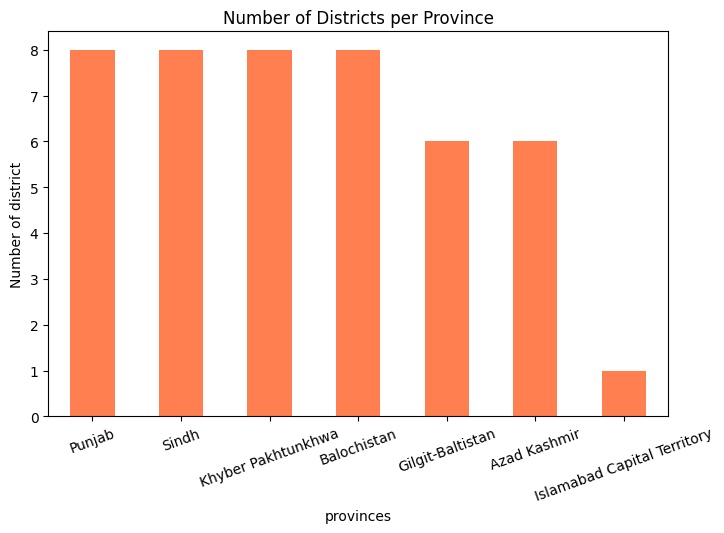

In [6]:
# province chart
no_of_districts.plot(kind='bar', figsize=(8,5), color = 'coral')
plt.title("Number of Districts per Province")
plt.xlabel('provinces')
plt.ylabel('Number of district')
plt.xticks(rotation=20)
plt.tight_layout

 4. Analyze Individual Features

A. Population

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

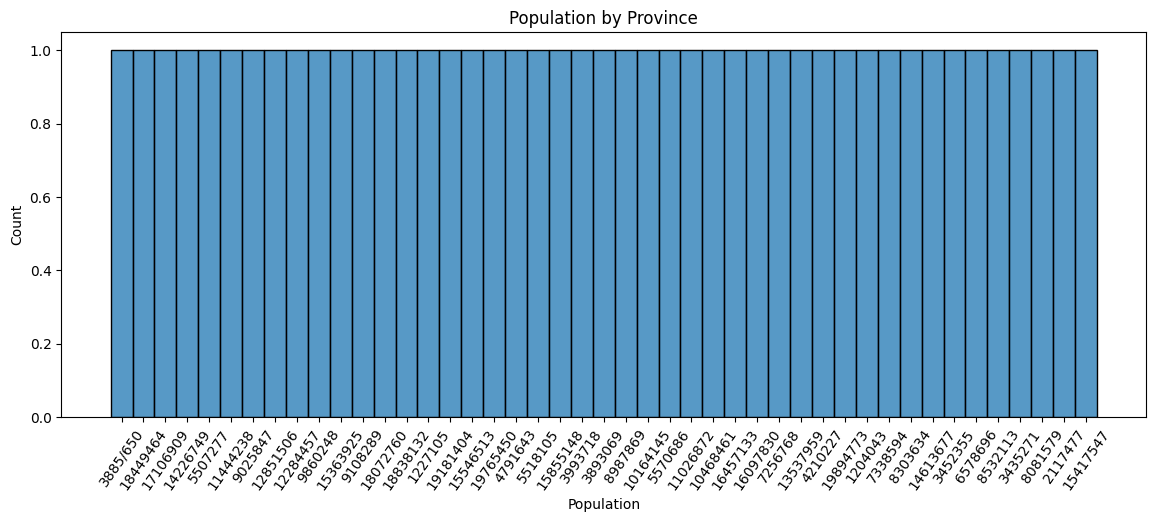

In [17]:
# population
figure = plt.figure(figsize=(14,5))
sns.histplot(data=census_data, x=census_data['Population'])
plt.title('Population by Province')
plt.xticks(rotation=55)
plt.tight_layout


Text(0.5, 1.0, 'Population by Province')

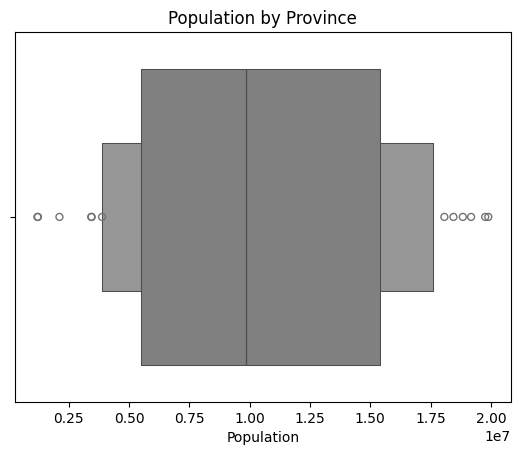

In [31]:
# population outliers
sns.boxenplot(data=cleaned_census_data, x='Population', color='grey')
plt.title('Population by Province')


B. Literacy Rate (%)

Text(0.5, 1.0, 'Educated in different districts')

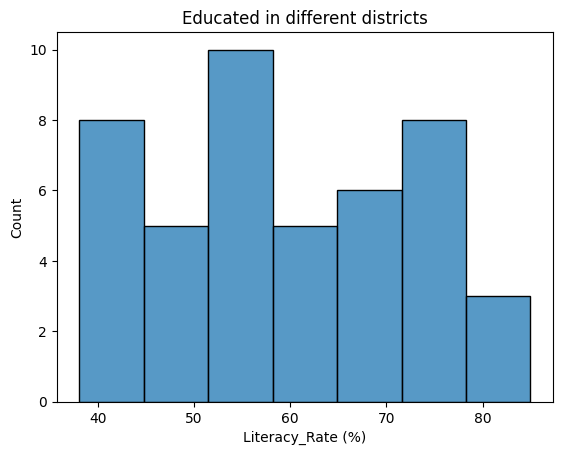

In [32]:
sns.histplot(data=cleaned_census_data, x='Literacy_Rate (%)')
plt.title('Educated in different districts')

Districts with Min/Max Literacy

In [33]:
cleaned_census_data['Literacy_Rate (%)'] = pd.to_numeric(cleaned_census_data['Literacy_Rate (%)'], errors='coerce')

lowest = cleaned_census_data.loc[cleaned_census_data['Literacy_Rate (%)'].idxmin()]
highest = cleaned_census_data.loc[cleaned_census_data['Literacy_Rate (%)'].idxmax()]

print("Lowest Literacy District:")
print(lowest[['District', 'Province', 'Literacy_Rate (%)']])

print("\nHighest Literacy District:")
print(highest[['District', 'Province', 'Literacy_Rate (%)']])

Lowest Literacy District:
District             Hattian Bala
Province             Azad Kashmir
Literacy_Rate (%)            38.1
Name: 43, dtype: object

Highest Literacy District:
District                     Bagh
Province             Azad Kashmir
Literacy_Rate (%)           84.97
Name: 41, dtype: object


C. Internet Penetration (%)

Text(0.5, 1.0, 'Digital access varies')

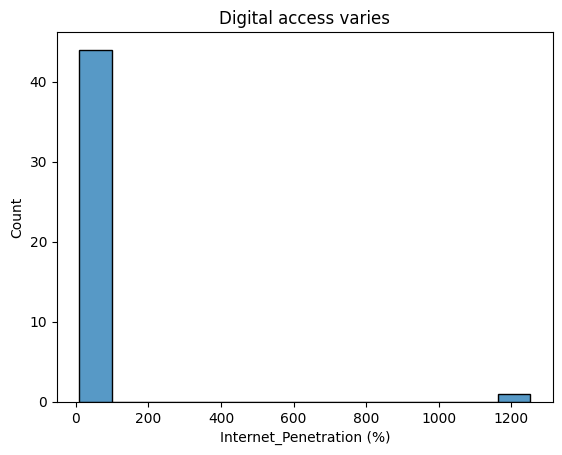

In [34]:
# Histogram
sns.histplot(data=cleaned_census_data, x='Internet_Penetration (%)')
plt.title('Digital access varies')

Text(0.5, 1.0, 'Digital access varies')

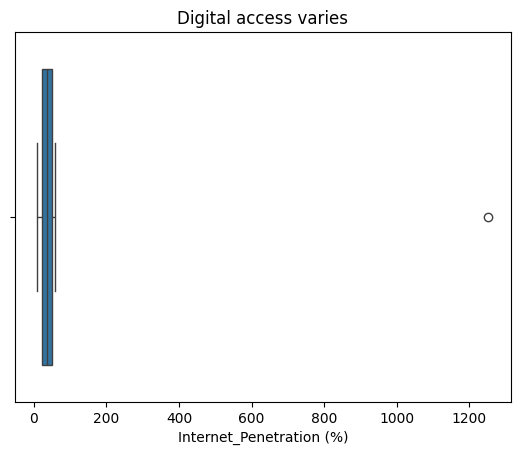

In [35]:
# boxplot for outliers
sns.boxplot(data=cleaned_census_data, x='Internet_Penetration (%)')
plt.title('Digital access varies')

Low-penetration districts

In [21]:
cleaned_census_data['Internet_Penetration (%)'] = pd.to_numeric(cleaned_census_data['Internet_Penetration (%)'])
low_penetration = cleaned_census_data.sort_values(by='Internet_Penetration (%)').head(10)
print(low_penetration[['District', 'Province', 'Internet_Penetration (%)']])

      District            Province  Internet_Penetration (%)
22    Mansehra  Khyber Pakhtunkhwa                     10.18
32      Gilgit    Gilgit-Baltistan                     11.16
1   Rawalpindi              Punjab                     11.64
18      Mardan  Khyber Pakhtunkhwa                     12.59
19        Swat  Khyber Pakhtunkhwa                     13.49
14   Nawabshah               Sindh                     13.64
11      Sukkur               Sindh                     13.93
4   Gujranwala              Punjab                     18.55
36     Ghanche    Gilgit-Baltistan                     20.47
24      Quetta         Balochistan                     20.94


D. Urbanization (%)

Text(0.5, 1.0, 'Urban of each district')

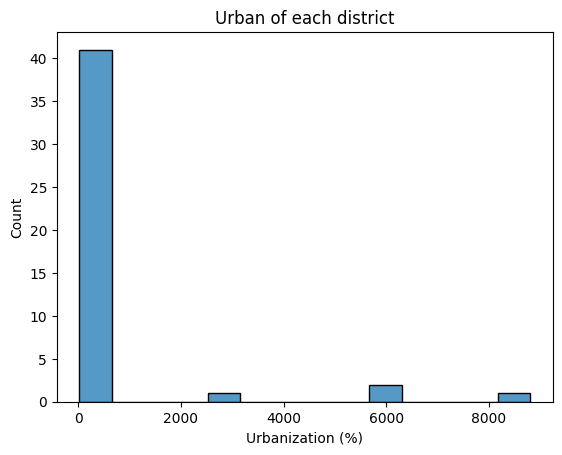

In [37]:
sns.histplot(data=cleaned_census_data, x='Urbanization (%)')
plt.title('Urban of each district')

Text(0.5, 1.0, 'Urban of each district')

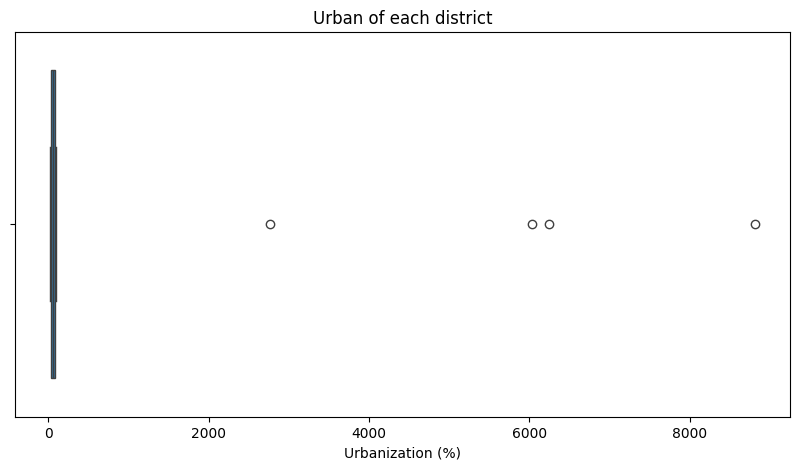

In [40]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_census_data,x='Urbanization (%)')
plt.title('Urban of each district')

E. Density

Text(0.5, 1.0, '')

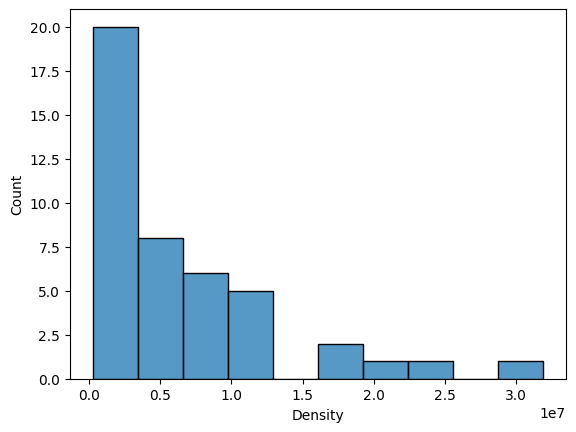

In [41]:
sns.histplot(data=cleaned_census_data, x='Density')
plt.title('')

Compare with population and area

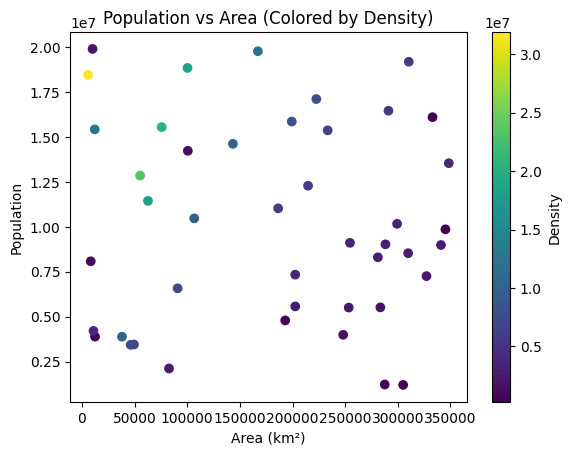

In [23]:
plt.scatter(cleaned_census_data['Area_km²'], cleaned_census_data['Population'], c=cleaned_census_data['Density'], cmap='viridis')
plt.xlabel('Area (km²)')
plt.ylabel('Population')
plt.title('Population vs Area (Colored by Density)')
plt.colorbar(label='Density')

5. Explore Relationships

A. Literacy vs Internet Access

C:\Users\shanz\AppData\Local\Temp\ipykernel_12232\1352337142.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_census_data, x='Literacy_Rate (%)', y='Internet_Penetration (%)', palette=('red'))


<Axes: xlabel='Literacy_Rate (%)', ylabel='Internet_Penetration (%)'>

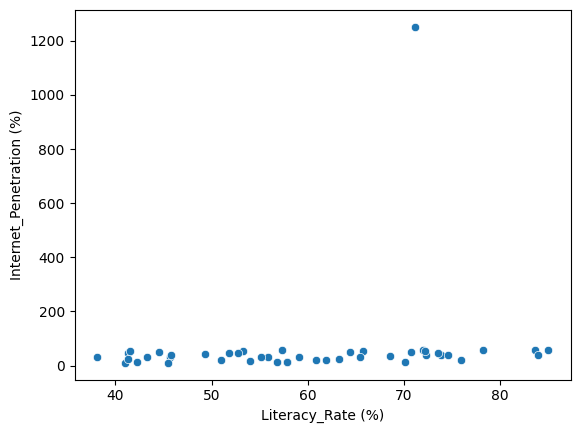

In [42]:
sns.scatterplot(data=cleaned_census_data, x='Literacy_Rate (%)', y='Internet_Penetration (%)', palette=('red'))

 B. Population vs Density

C:\Users\shanz\AppData\Local\Temp\ipykernel_12232\1298121632.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_census_data, x='Population', y='Density', palette='red')


<Axes: xlabel='Population', ylabel='Density'>

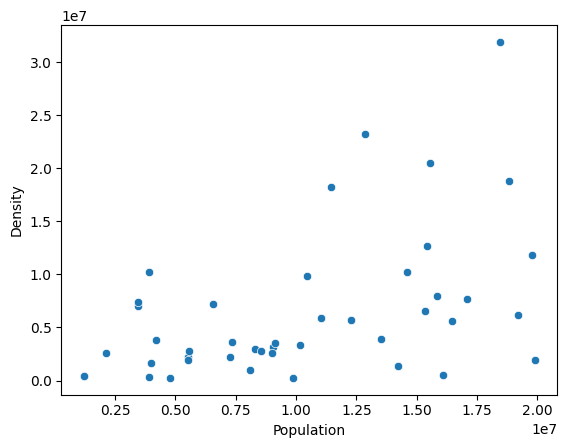

In [43]:
sns.scatterplot(data=cleaned_census_data, x='Population', y='Density', palette='red')

C. Urbanization vs Literacy

C:\Users\shanz\AppData\Local\Temp\ipykernel_12232\2764827018.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_census_data, x='Urbanization (%)', y='Literacy_Rate (%)', palette='red')


<Axes: xlabel='Urbanization (%)', ylabel='Literacy_Rate (%)'>

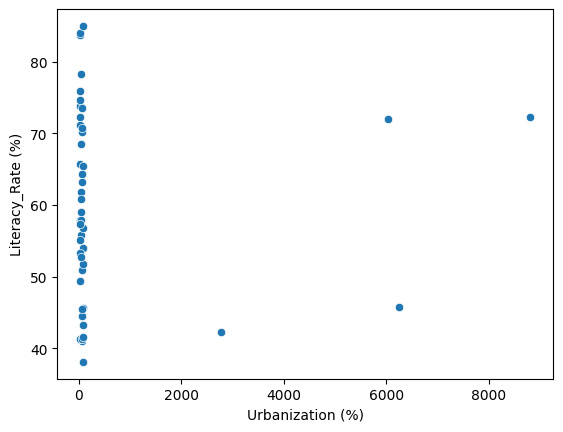

In [44]:
sns.scatterplot(data=cleaned_census_data, x='Urbanization (%)', y='Literacy_Rate (%)', palette='red')

D. Correlation Matrix + Heatmap

In [5]:
numeric_data = cleaned_census_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
corr_matrix

,Population,Area_km²,Density,Literacy_Rate (%),Internet_Penetration (%),Urbanization (%)
Population,1.000000,-0.008755,0.483720,0.039294,0.081765,-0.026616
Area_km²,-0.008755,1.000000,-0.494412,0.243879,0.043447,0.218480
Density,0.483720,-0.494412,1.000000,-0.063292,-0.005317,-0.184871
Literacy_Rate (%),0.039294,0.243879,-0.063292,1.000000,0.159264,0.042083
Internet_Penetration (%),0.081765,0.043447,-0.005317,0.159264,1.000000,-0.036437
Urbanization (%),-0.026616,0.218480,-0.184871,0.042083,-0.036437,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns')

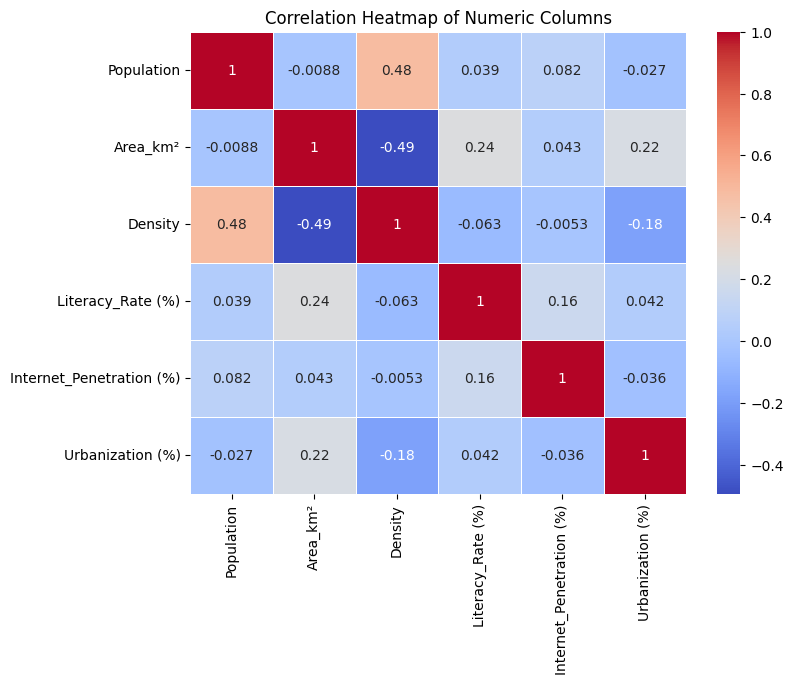

In [37]:
# heat map
figure = plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")


6. Grouped Analysis

A. Average values per province

In [6]:
# agg_province_avg = cleaned_census_data.groupby('Province').mean()

avg_values = cleaned_census_data.groupby('Province')[['Literacy_Rate (%)','Internet_Penetration (%)','Urbanization (%)','Population']].mean()
avg_values

,Literacy_Rate (%),Internet_Penetration (%),Urbanization (%),Population
Province,,,,
Azad Kashmir,59.458333,41.813333,61.305000,5.366248e+06
Balochistan,62.601250,36.453750,822.703750,1.132248e+07
Gilgit-Baltistan,54.825000,35.911667,1040.868333,9.260825e+06
Islamabad Capital Territory,70.740000,50.180000,74.840000,1.541755e+07
Khyber Pakhtunkhwa,59.527500,29.635000,393.240000,9.793939e+06
Punjab,59.096250,33.772500,1152.681250,1.156220e+07
Sindh,60.393750,187.096250,53.310000,1.299204e+07


Literacy Rate

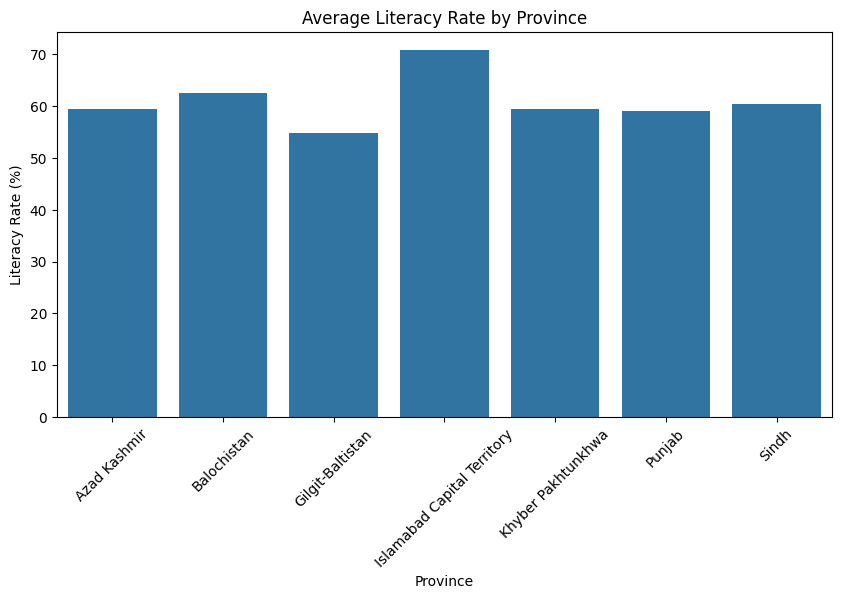

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_values.index, y=avg_values['Literacy_Rate (%)'])
plt.title('Average Literacy Rate by Province')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=45)
plt.show()

 Internet Penetration


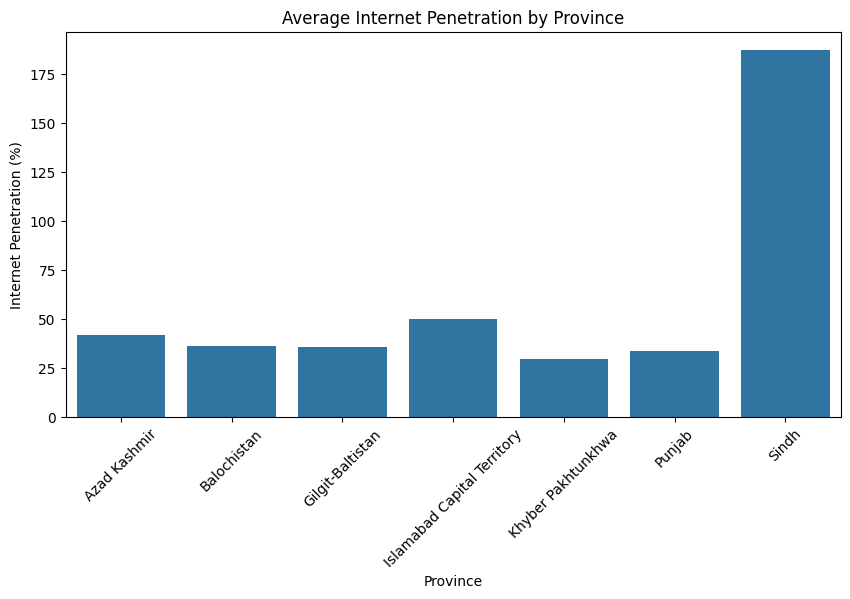

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_values.index, y=avg_values['Internet_Penetration (%)'])
plt.title('Average Internet Penetration by Province')
plt.ylabel('Internet Penetration (%)')
plt.xticks(rotation=45)
plt.show()

 Urbanization


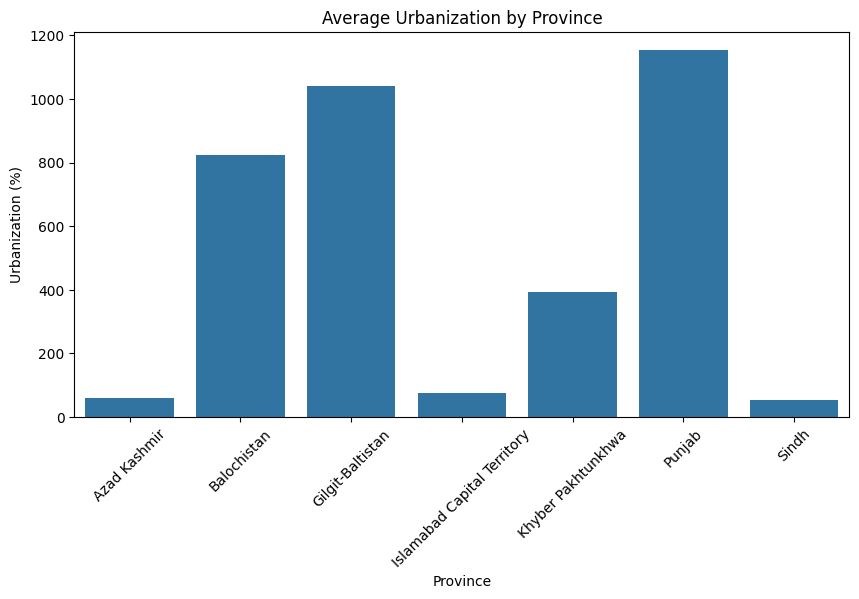

In [45]:

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_values.index, y=avg_values['Urbanization (%)'])
plt.title('Average Urbanization by Province')
plt.ylabel('Urbanization (%)')
plt.xticks(rotation=45)
plt.show()

 Population


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Azad Kashmir'),
  Text(1, 0, 'Balochistan'),
  Text(2, 0, 'Gilgit-Baltistan'),
  Text(3, 0, 'Islamabad Capital Territory'),
  Text(4, 0, 'Khyber Pakhtunkhwa'),
  Text(5, 0, 'Punjab'),
  Text(6, 0, 'Sindh')])

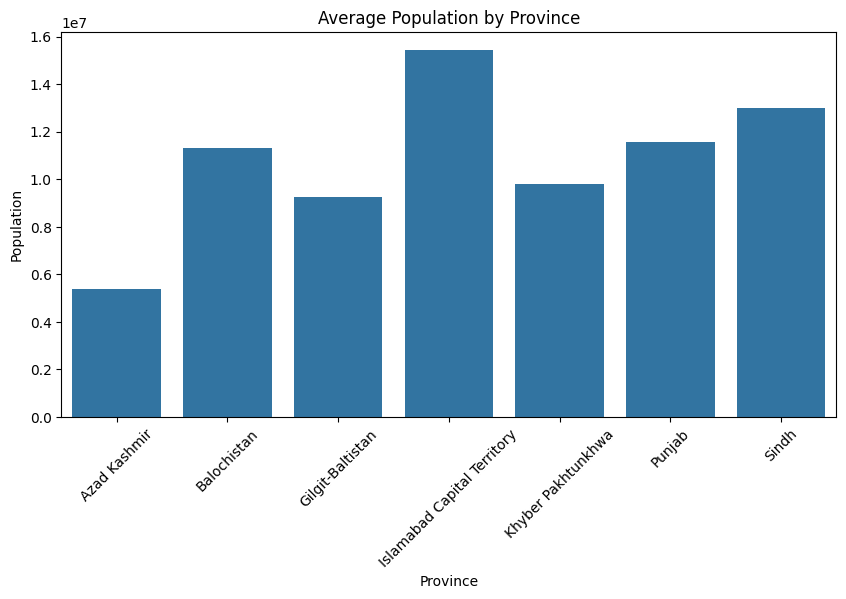

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_values.index, y=avg_values['Population'])
plt.title('Average Population by Province')
plt.ylabel('Population')
plt.xticks(rotation=45)

7. Identify Key Insights


Most literate district

In [14]:
most_literate_district_idx = cleaned_census_data['Literacy_Rate (%)'].idxmax()
most_literate = cleaned_census_data.loc[most_literate_district_idx]
most_literate_value = most_literate['Literacy_Rate (%)']
most_literate_value

np.float64(84.97)

Most urbanized district

In [16]:
most_urbanize_district_idx = cleaned_census_data['Urbanization (%)'].idxmax()
most_urbanize = cleaned_census_data.loc[most_urbanize_district_idx]
most_urbanize_value = most_urbanize['Urbanization (%)']
most_urbanize_value

np.float64(8812.0)

Least internet-penetrated province

In [17]:
least_Internet_idx = cleaned_census_data['Internet_Penetration (%)'].idxmin()
least_Internet = cleaned_census_data.loc[least_Internet_idx]
least_Internet_value = least_Internet['Internet_Penetration (%)']
least_Internet_value

np.float64(10.18)

Top 5 literate districts to CSV for report

In [22]:
top_literate_district = cleaned_census_data.sort_values('Literacy_Rate (%)').head()
top_literate_district[['Province', 'District', 'Literacy_Rate (%)']]

,Province,District,Literacy_Rate (%)
43,Azad Kashmir,Hattian Bala,38.10
32,Gilgit-Baltistan,Gilgit,41.01
34,Gilgit-Baltistan,Diamer,41.33
33,Gilgit-Baltistan,Skardu,41.34
40,Azad Kashmir,Kotli,41.54


Q: Which province has the highest number of districts?

In [7]:
district_counts = cleaned_census_data['Province'].value_counts()
print(district_counts)


Province
Punjab                         8
Sindh                          8
Khyber Pakhtunkhwa             8
Balochistan                    8
Gilgit-Baltistan               6
Azad Kashmir                   6
Islamabad Capital Territory    1
Name: count, dtype: int64


Q: Which district has the highest literacy rate?

In [9]:
max_lit = cleaned_census_data.loc[cleaned_census_data['Literacy_Rate (%)'].idxmax()]
print(max_lit[['Province', 'District', 'Literacy_Rate (%)']])


Province             Azad Kashmir
District                     Bagh
Literacy_Rate (%)           84.97
Name: 41, dtype: object


Q: Which province has the lowest internet penetration on average?

In [10]:
internet_by_province = cleaned_census_data.groupby("Province")["Internet_Penetration (%)"].mean().sort_values()
print(internet_by_province)


Province
Khyber Pakhtunkhwa              29.635000
Punjab                          33.772500
Gilgit-Baltistan                35.911667
Balochistan                     36.453750
Azad Kashmir                    41.813333
Islamabad Capital Territory     50.180000
Sindh                          187.096250
Name: Internet_Penetration (%), dtype: float64


Q: Which district has the highest population density?

In [11]:
high_density = cleaned_census_data.sort_values("Density", ascending=False).head()
print(high_density[['District', 'Density']])


      District     Density
1   Rawalpindi  31908450.0
7     Sargodha  23274970.0
16    Peshawar  20531850.0
13  Mirpurkhas  18786090.0
5   Bahawalpur  18250340.0


Q: Which districts have a high urban population but low internet penetration?

In [12]:
suspicious = cleaned_census_data[
    (cleaned_census_data['Urbanization (%)'] > 50) & (cleaned_census_data['Internet_Penetration (%)'] < 20)
]
print(suspicious[['District', 'Urbanization (%)', 'Internet_Penetration (%)']])


      District  Urbanization (%)  Internet_Penetration (%)
4   Gujranwala             87.00                     18.55
11      Sukkur             64.45                     13.93
14   Nawabshah             83.92                     13.64
18      Mardan           2768.00                     12.59
22    Mansehra             70.55                     10.18
32      Gilgit             58.77                     11.16


Q: Which regions show both high literacy and high urbanization?

In [13]:
filtered = cleaned_census_data[(cleaned_census_data['Province'].isin(['Sindh', 'Punjab'])) & 
                      (cleaned_census_data['Urbanization (%)'] > 60) & 
                      (cleaned_census_data['Literacy_Rate (%)'] > 60)]
print(filtered[['Province', 'District', 'Urbanization (%)', 'Literacy_Rate (%)']])


   Province    District  Urbanization (%)  Literacy_Rate (%)
2    Punjab  Faisalabad             69.09              64.38
6    Punjab     Sialkot           8812.00              72.30
11    Sindh      Sukkur             64.45              70.13


Q: What is the distribution of population across provinces?

In [15]:
print(cleaned_census_data[['District', 'Population']].sort_values('Population', ascending=False).head(5))
print(cleaned_census_data[['District', 'Population']].sort_values('Population').head(5))


      District  Population
33      Skardu    19894773
17  Abbottabad    19765450
15      Thatta    19181404
13  Mirpurkhas    18838132
1   Rawalpindi    18449464
        District  Population
34        Diamer     1204043
14     Nawabshah     1227105
43  Hattian Bala     2117477
41          Bagh     3435271
38  Muzaffarabad     3452355


Q: Which small districts (area < 1000) have high literacy (above 80%)?

In [16]:
small_area = cleaned_census_data[cleaned_census_data['Area_km²'] < 15000]
high_lit = small_area[small_area['Literacy_Rate (%)'] > 70]
print(high_lit[['District', 'Area_km²', 'Literacy_Rate (%)']])


     District  Area_km²  Literacy_Rate (%)
44  Islamabad     12128              70.74


Q: Which districts have very low population density despite large area size?